### The goal of this XP:
- Create a template image for functional QC in zooniverse platform - Brain Match 

In [31]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak-v0.18.1 zooniverse_qc  

Adding library niak-v0.18.1 to the search path.

Adding library zooniverse_qc to the search path.



In [32]:
% Set parameters
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
param.transparency = 0.7;
param.perc_min = 0.05;
param.perc_max = 0.95;

### Invert image

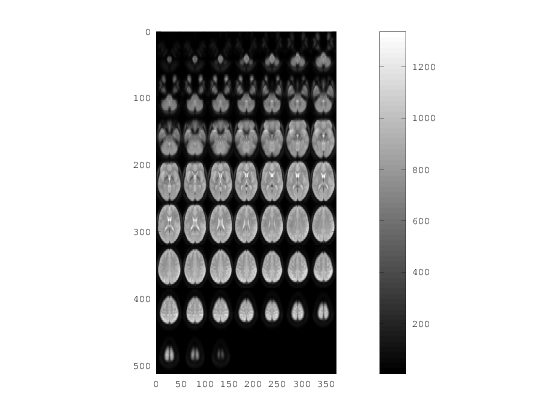

In [33]:
% Input images
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/func_mean_average_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([path_root 'template_layout/test_data/func_mask_group_stereonl.nii.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

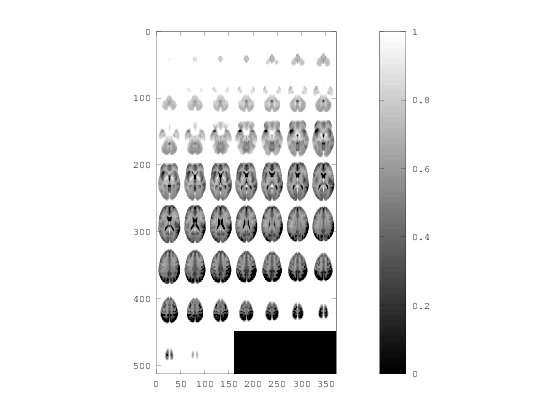

In [34]:
% Invert contrast
mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = sqrt(vol);
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

### Create montage for the template

In [35]:
clear jin jout jopt
% Input
niak_gb_vars
jin.source = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.limits = 'adaptative';
jopt.method = 'linear';
jopt.flag_decoration = false;
jopt.coord =[-30 , -65 , -15 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);

    psom_struct_defaults at line 112 column 5
    niak_brick_vol2img at line 54 column 5


error: print: no axes object in figure to print
error: called from
    print at line 304 column 5
    _make_figures>inner_print at line 71 column 5
    _make_figures>safe_print at line 62 column 5
    _make_figures at line 51 column 13



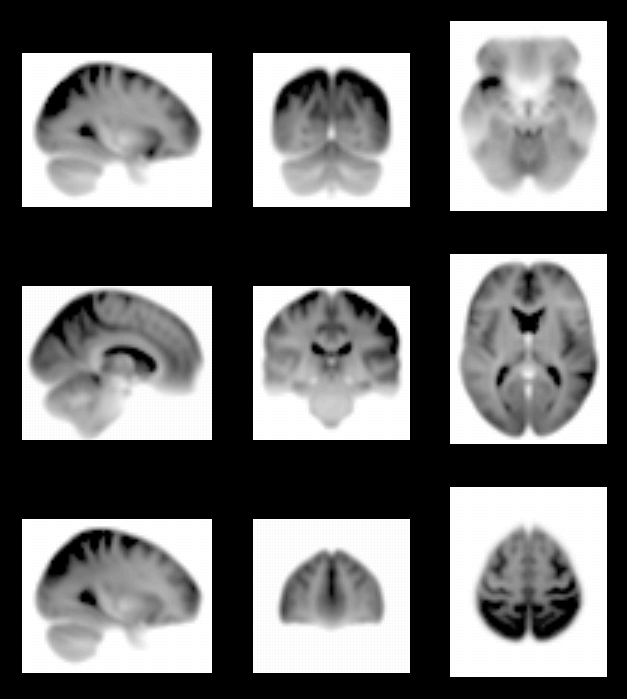

In [36]:
imshow([path_root 'template_layout/test_data/func_mean_average_stereonl.png'])

In [37]:
%% Add overlay 
clear jin jout jopt
jin.background =  [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];
jin.overlay =  [path_root 'template_layout/test_data/mask_all_layout_v2_smoothed.nii.gz'];
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);

error: Magick++ exception: Magick: No decode delegate for this image format (/tmp/gmwkcFPo) reported by magick/constitute.c:1528 (ReadImage)
error: called from
    __imread__ at line 86 column 10
    imageIO at line 117 column 26
    imread at line 106 column 30
    niak_brick_add_overlay at line 48 column 6


In [38]:
% Subject Invert image
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/func_X_0015002_mean_stereolin.nii.gz']);
[hdr,mask] = niak_read_vol([path_root 'template_layout/test_data/func_mask_group_stereonl.nii.gz']);
mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = sqrt(vol);
opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

error: A(I): index out of bounds; value 174878 out of bound 156032
error: A(I): index out of bounds; value 174878 out of bound 156032
error: Invalid resizing operation or ambiguous assignment to an out-of-bounds array element
error: operator =: no conversion for assignment of 'float complex matrix' to indexed 'complex matrix'
error: called from
    niak_montage at line 201 column 87
error: assignment failed, or no method for 'matrix = float complex matrix'
error: called from
    niak_montage at line 201 column 87


error: print: no axes object in figure to print
error: called from
    print at line 304 column 5
    _make_figures>inner_print at line 71 column 5
    _make_figures>safe_print at line 62 column 5
    _make_figures at line 51 column 13



In [ ]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_inv.nii.gz'];
jin.target = [path_root 'template_layout/test_data/template.nii.gz'];

% Output
jout = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.limits = 'adaptative';
jopt.method = 'linear';
jopt.flag_decoration = false;
jopt.coord =[-30 , -65 , -15 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt)

In [78]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/func_X_0015002_mean_stereonl.png'];
jin.overlay = [path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'];
jout = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_outline.png';
jopt.transparency = param.transparency ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);